In [ ]:
#%pip install -q -r requirements.txt

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


# Определение перспективного тарифа для телеком-компании

## Описание данных
Таблица **users** (информация о пользователях):

- `user_id` — уникальный идентификатор пользователя
- `first_name` — имя пользователя
- `last_name` — фамилия пользователя
- `age` — возраст пользователя (годы)
- `reg_date` — дата подключения тарифа (день, месяц, год)
- `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- `city` — город проживания пользователя
- `tarif` — название тарифного плана

Таблица **calls** (информация о звонках):

- `id` — уникальный номер звонка
- `call_date` — дата звонка
- `duration` — длительность звонка в минутах
- `user_id` — идентификатор пользователя, сделавшего звонок

Таблица **messages** (информация о сообщениях):

- `id` — уникальный номер сообщения
- `message_date` — дата сообщения
- `user_id` — идентификатор пользователя, отправившего сообщение

Таблица **internet** (информация об интернет-сессиях):

- `id` — уникальный номер сессии
- `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
- `session_date` — дата интернет-сессии
- `user_id` — идентификатор пользователя

Таблица **tariffs** (информация о тарифах):

- `tariff_name` — название тарифа
- `rub_monthly_fee` — ежемесячная абонентская плата в рублях
- `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
- `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
- `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
- `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## 1. Изучение данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

Откроем и изучим таблицу **calls**

In [ ]:
df_calls = pd.read_csv('/datasets/calls.csv')
display(df_calls.head())
df_calls.info()
display(df_calls.describe())
print('Количество дубликатов:', df_calls.duplicated().sum())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
Количество дубликатов: 0


Откроем и изучим таблицу **internet**


In [ ]:
df_internet = pd.read_csv('/datasets/internet.csv', index_col=0)
display(df_internet.head())
df_internet.info()
display(df_internet.describe())
print('Количество дубликатов:', df_internet.duplicated().sum())

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


Количество дубликатов: 0


Откроем и изучим таблицу **messages**

In [ ]:
df_messages = pd.read_csv('/datasets/messages.csv')
display(df_messages.head())
df_messages.info()
print('Количество дубликатов:', df_messages.duplicated().sum())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
Количество дубликатов: 0


Откроем и изучим таблицу **tariffs**

In [ ]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
display(df_tariffs.head())
df_tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [ ]:
df_tariffs = df_tariffs.set_index('/datasets/tariff_name')
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
tariff_name,,,,,,,
smart,50,15360,500,550,200,3,3
ultra,1000,30720,3000,1950,150,1,1


Откроем и изучим таблицу **users**

In [ ]:
df_users = pd.read_csv('/datasets/users.csv')
display(df_users.head())
df_users.info()
display(df_users.describe())
print('Количество дубликатов:', df_users.duplicated().sum())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
Количество дубликатов: 0


In [ ]:
df_users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

Данные в таблицах корректны, дубликатов нет, столбцы с датами следует привести к типу данных "datetime"

## 2. Подготовка данных

### Приведение данных к нужным типам

Приведем столбцы с датой к типу "datetime"

In [ ]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format="%Y-%m-%d")
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format="%Y-%m-%d")
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format="%Y-%m-%d")
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format="%Y-%m-%d")
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format="%Y-%m-%d")

В таблицы **df_calls**, **df_internet**, **df_messages** добавим столбцы `month` — месяц

In [ ]:
df_calls['month'] = df_calls['call_date'].astype('datetime64[M]')
df_internet['month'] = df_internet['session_date'].astype('datetime64[M]')
df_messages['month'] = df_messages['message_date'].astype('datetime64[M]')

Округлим значения в столбце `duration`, таблицы **df_calls**, до целых минут в большую сторону, в соответствии с условиями компании

In [ ]:
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')

### Подсчет данных

Посчитаем количество звонков для каждого пользователя по месяцам, создадим таблицу **calls_count**

In [ ]:
calls_count = df_calls.groupby(['user_id', 'month']).agg(count=('duration','count'))
calls_count

count
user_id month            
1000    2018-05-01     22
        2018-06-01     43
        2018-07-01     47
        2018-08-01     52
        2018-09-01     58
...                   ...
1498    2018-10-01     41
1499    2018-09-01      9
        2018-10-01     68
        2018-11-01     74
        2018-12-01     69

[3174 rows x 1 columns]

Посчитаем количество израсходованных минут разговора для каждого пользователя по месяцам, создадим таблицу **calls_sum**

In [ ]:
calls_sum = df_calls.groupby(['user_id', 'month']).agg(min=('duration','sum'))
calls_sum

min
user_id month          
1000    2018-05-01  159
        2018-06-01  172
        2018-07-01  340
        2018-08-01  408
        2018-09-01  466
...                 ...
1498    2018-10-01  247
1499    2018-09-01   70
        2018-10-01  449
        2018-11-01  612
        2018-12-01  492

[3174 rows x 1 columns]

Посчитаем количество отправленных сообщений для каждого пользователя по месяцам, создадим таблицу **messages_count**

In [ ]:
messages_count = df_messages.groupby(['user_id', 'month']).agg(sms=('id','count'))
messages_count

sms
user_id month          
1000    2018-05-01   22
        2018-06-01   60
        2018-07-01   75
        2018-08-01   81
        2018-09-01   57
...                 ...
1498    2018-10-01   42
1499    2018-09-01   11
        2018-10-01   48
        2018-11-01   59
        2018-12-01   66

[2717 rows x 1 columns]

Посчитаем объем израсходованного интернет-трафика для каждого пользователя по месяцам, создадим таблицу **internet_volume**

In [ ]:
internet_volume = df_internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})

Сумму мегабайт переведем в сумму гигабайт и округлим в большую сторону, в соответствии с условиями компании

In [ ]:
mb_in_gb = 1024
internet_volume = internet_volume / mb_in_gb
internet_volume = np.ceil(internet_volume).astype('int')
internet_volume.columns = ['gb']
internet_volume

gb
user_id month         
1000    2018-05-01   3
        2018-06-01  23
        2018-07-01  14
        2018-08-01  14
        2018-09-01  15
...                 ..
1498    2018-10-01  21
1499    2018-09-01   2
        2018-10-01  18
        2018-11-01  18
        2018-12-01  13

[3203 rows x 1 columns]

Посчитаем выручку с каждого пользователя, для этого создадим сводную таблицу **users** по пользователям с названием тарифа и городом проживания

In [ ]:
users = df_users[['user_id','tariff','city']]
users

,user_id,tariff,city
0,1000,ultra,Краснодар
1,1001,smart,Москва
2,1002,smart,Стерлитамак
3,1003,ultra,Москва
4,1004,ultra,Новокузнецк
...,...,...,...
495,1495,ultra,Иркутск
496,1496,smart,Вологда
497,1497,smart,Челябинск
498,1498,smart,Владикавказ


Далее объединим выше полученные таблицы по пользователям и месяцам, в общую таблицу **df**

In [ ]:
calls_sum = calls_sum.reset_index()
messages_count = messages_count.reset_index()
internet_volume = internet_volume.reset_index()

df = calls_sum.merge(messages_count, on=['user_id', 'month'], how='outer')
df = df.merge(internet_volume, on=['user_id', 'month'], how='outer')
df = df.merge(users, on=['user_id'], how='left')

df.head()

,user_id,month,min,sms,gb,tariff,city
0,1000,2018-05-01,159.0,22.0,3.0,ultra,Краснодар
1,1000,2018-06-01,172.0,60.0,23.0,ultra,Краснодар
2,1000,2018-07-01,340.0,75.0,14.0,ultra,Краснодар
3,1000,2018-08-01,408.0,81.0,14.0,ultra,Краснодар
4,1000,2018-09-01,466.0,57.0,15.0,ultra,Краснодар


Посчитаем перерасход мин, смс, гб и добавим в столбцы `over_min`, `over_sms`, `over_gb`

In [ ]:
def over_min(df):
    if df['tariff'] == 'smart':
        return df['min'] - df_tariffs.loc[df['tariff'], 'minutes_included']
    elif df['tariff'] == 'ultra':
        return df['min'] - df_tariffs.loc[df['tariff'], 'minutes_included']

df['over_min'] = df.apply(over_min, axis = 1)

def over_sms(df):
    if df['tariff'] == 'smart':
        return df['sms'] - df_tariffs.loc[df['tariff'], 'messages_included']
    elif df['tariff'] == 'ultra':
        return df['sms'] - df_tariffs.loc[df['tariff'], 'messages_included']

df['over_sms'] = df.apply(over_sms, axis = 1)

def over_gb(df):
    if df['tariff'] == 'smart':
        return df['gb'] - df_tariffs.loc[df['tariff'], 'mb_per_month_included'] / mb_in_gb
    elif df['tariff'] == 'ultra':
        return df['gb'] - df_tariffs.loc[df['tariff'], 'mb_per_month_included'] / mb_in_gb

df['over_gb'] = df.apply(over_gb, axis = 1)

Пропуски в таблице **df** заменим на ноль и приведем данные к целочисленному типу

In [ ]:
df[['min', 'sms', 'gb', 'over_min', 'over_sms','over_gb']
  ] = df[['min', 'sms', 'gb', 'over_min', 'over_sms', 'over_gb']].fillna(0).astype('int')
df.head()

,user_id,month,min,sms,gb,tariff,city,over_min,over_sms,over_gb
0,1000,2018-05-01,159,22,3,ultra,Краснодар,-2841,-978,-27
1,1000,2018-06-01,172,60,23,ultra,Краснодар,-2828,-940,-7
2,1000,2018-07-01,340,75,14,ultra,Краснодар,-2660,-925,-16
3,1000,2018-08-01,408,81,14,ultra,Краснодар,-2592,-919,-16
4,1000,2018-09-01,466,57,15,ultra,Краснодар,-2534,-943,-15


Посчитаем выручку с каждого пользователя по месяцам и запишем ее в столбец `revenue`, таблицы **df**

In [ ]:
def revenue(df):
    revenue_min = 0
    revenue_sms = 0
    revenue_gb = 0
    
    if df['tariff'] == 'smart':
        if df['over_min'] > 0:
            revenue_min = df['over_min'] * df_tariffs.loc[df['tariff'], 'rub_per_minute']
        if df['over_sms'] > 0:
            revenue_sms = df['over_sms'] * df_tariffs.loc[df['tariff'], 'rub_per_message']
        if df['over_gb'] > 0:
            revenue_gb = df['over_gb'] * df_tariffs.loc[df['tariff'], 'rub_per_gb']
        return revenue_min + revenue_sms + revenue_gb + df_tariffs.loc[df['tariff'], 'rub_monthly_fee']
    elif df['tariff'] == 'ultra':
        if df['over_min'] > 0:
            revenue_min = df['over_min'] * df_tariffs.loc[df['tariff'], 'rub_per_minute']
        if df['over_sms'] > 0:
            revenue_sms = df['over_sms'] * df_tariffs.loc[df['tariff'], 'rub_per_message']
        if df['over_gb'] > 0:
            revenue_gb = df['over_gb'] * df_tariffs.loc[df['tariff'], 'rub_per_gb']
        return revenue_min + revenue_sms + revenue_gb + df_tariffs.loc[df['tariff'], 'rub_monthly_fee']
    
df['revenue'] = df.apply(revenue, axis = 1)

In [ ]:
df.head()

,user_id,month,min,sms,gb,tariff,city,over_min,over_sms,over_gb,revenue
0,1000,2018-05-01,159,22,3,ultra,Краснодар,-2841,-978,-27,1950
1,1000,2018-06-01,172,60,23,ultra,Краснодар,-2828,-940,-7,1950
2,1000,2018-07-01,340,75,14,ultra,Краснодар,-2660,-925,-16,1950
3,1000,2018-08-01,408,81,14,ultra,Краснодар,-2592,-919,-16,1950
4,1000,2018-09-01,466,57,15,ultra,Краснодар,-2534,-943,-15,1950


Для дальнейшего анализа добавим столбец `region` — регион, в котором значения значения в столбце `city` пользователей не из Москвы, заменим на значение "другой регион"

In [ ]:
df['region'] = df['city'].where(df['city'] == 'Москва', 'другой регион')
df.head()

,user_id,month,min,sms,gb,tariff,city,over_min,over_sms,over_gb,revenue,region
0,1000,2018-05-01,159,22,3,ultra,Краснодар,-2841,-978,-27,1950,другой регион
1,1000,2018-06-01,172,60,23,ultra,Краснодар,-2828,-940,-7,1950,другой регион
2,1000,2018-07-01,340,75,14,ultra,Краснодар,-2660,-925,-16,1950,другой регион
3,1000,2018-08-01,408,81,14,ultra,Краснодар,-2592,-919,-16,1950,другой регион
4,1000,2018-09-01,466,57,15,ultra,Краснодар,-2534,-943,-15,1950,другой регион


## 3. Анализ данных

Посчитаем среднее количество минут, сообщений и гигабайт для пользователей каждого тарифа в месяц, а также медиану, дисперсию, и стандартное отклонение по каждому тарифу, создадим таблицу **average_tariff**

In [ ]:
average_tariff = df.pivot_table(index='tariff', values=['min', 'sms', 'gb'], aggfunc=['median', 'mean', np.var, np.std]).round().astype('int')
average_tariff

median          mean          var               std         
           gb  min sms   gb  min sms  gb     min   sms  gb  min sms
tariff                                                             
smart      17  422  28   16  418  33  33   36219   797   6  190  28
ultra      19  518  38   19  527  49  97  100874  2285  10  318  48

Построим гистограммы для минут, сообщений и гигабайт, по каждому тарифу

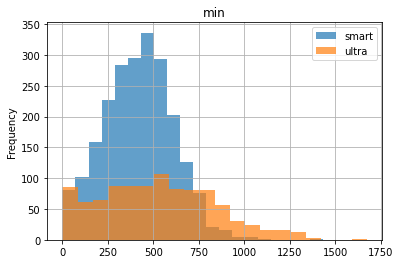

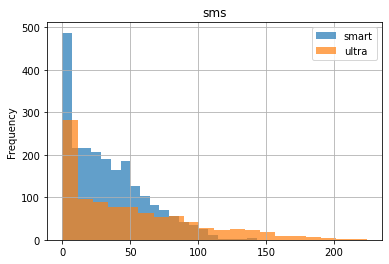

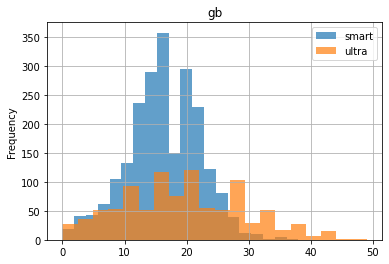

In [ ]:
for name in ['min', 'sms', 'gb']:
    ax = df.query('tariff == "smart"').plot(
    kind='hist',
    y=name,
    bins=20,
    alpha=0.7,
    label='smart',
    grid=True,
    legend=True,
    title=name,
    )
    df.query('tariff == "ultra"').plot(
    kind='hist',
    y=name,
    bins=20,
    alpha=0.7,
    label='ultra',
    ax=ax,
    grid=True,
    legend=True,
    )

Распределение количества минут и гигабайт по тарифу "smart" незначительно скошено влево, а по тарифу "ultra" — вправо, а распределения по количеству сообщений имеют вид распределения Пуассона и скошены вправо, причем по тарифу "ultra" немного больше. Дисперсии по тарифу "ultra" больше чем по тарифу "smart". Средние значения и медианы по тарифу "ultra" также больше чем по тарифу "smart". Все это говорит о том что пользователи тарифа "ultra" больше пользуются услугами сотовой связи, а пользователи тарифа "smart" — меньше. Пользователи тарифа "smart" вынуждены экономить на услугах связи и чаще доплачивать за дополнительные пакеты услуг.

## 4. Проверка гипотез

Проверим гипотезу — средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются\
Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства\
Сформулируем гипотезы:
- $H_0$ — средняя выручка пользователей тарифов «Ультра» и «Смарт» равны
- $H_1$ — средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

alpha = 0.05 — критический уровень статистической значимости

Посмотрим среднее и дисперсию выручки по тарифам, создадим таблицу **average_revenue**

In [ ]:
average_revenue = df.pivot_table(index='tariff', values='revenue', aggfunc=['median', 'mean', np.var, np.std]).round().astype('int')
average_revenue

,median,mean,var,std
,revenue,revenue,revenue,revenue
tariff,,,,
smart,1023,1290,669786,818
ultra,1950,2070,141517,376


Средняя выручка по тарифу "ultra", больше чем по тарифу "smart"

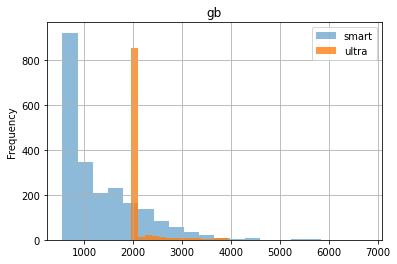

In [ ]:
ax = df.query('tariff == "smart"').plot(
    kind='hist',
    y='revenue',
    bins=20,
    alpha=0.5,
    label='smart',
    grid=True,
    legend=True,
    title=name,
)
df.query('tariff == "ultra"').plot(
    kind='hist',
    y='revenue',
    bins=20,
    alpha=0.8,
    label='ultra',
    ax=ax,
    grid=True,
    legend=True,
);

In [ ]:
alpha = 0.05

results = st.ttest_ind(df.query('tariff == "smart"')['revenue'], df.query('tariff == "ultra"')['revenue'], equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Проверим гипотезу — средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов\
Сформулируем гипотезы:
- $H_0$ — средняя выручка пользователей из Москвы равна выручке пользователей из других регионов
- $H_1$ — средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

alpha = 0.05 — критический уровень статистической значимости

Посмотрим среднее и дисперсию выручки по Москве и другим регионам, создадим таблицу **average_region**

In [ ]:
average_region = df.pivot_table(index='region', values='revenue', aggfunc=['median', 'mean', np.var, np.std]).round().astype('int')
average_region

,median,mean,var,std
,revenue,revenue,revenue,revenue
region,,,,
Москва,1750,1547,565636,752
другой регион,1583,1525,654138,809


- Средняя выручка пользователей из Москвы незначительно отличается от выручки пользователей из других регионов

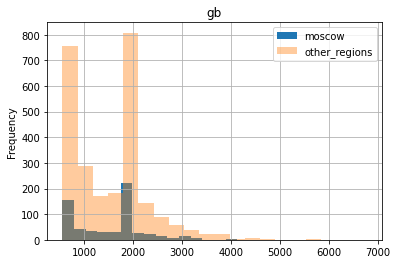

In [ ]:
ax = df.query('region == "Москва"').plot(
    kind='hist',
    y='revenue',
    bins=20,
    alpha=1,
    label='moscow',
    grid=True,
    legend=True,
    title=name,
)
df.query('region == "другой регион"').plot(
    kind='hist',
    y='revenue',
    bins=20,
    alpha=0.4,
    label='other_regions',
    ax=ax,
    grid=True,
    legend=True,
);

In [ ]:
alpha = 0.05

results = st.ttest_ind(df.query('region == "Москва"')['revenue'], df.query('region == "другой регион"')['revenue'], equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


- Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов

## 5. Общий вывод

- Cредняя выручка пользователей тарифа "ultra" больше чем тарифа "smart"
- Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов
- Пользователи тарифа "ultra" больше пользуются услугами сотовой связи, а пользователи тарифа "smart" — меньше.
- Пользователи тарифа "smart" вынуждены экономить на услугах связи и чаще доплачивать за дополнительные пакеты услуг.
- Для компании тариф "ultra" кажется выгоднее, потому что статистически значимо приносит больше средней выручки и при этом, судя по гистограммам, пользователи "ultra" нагружают сеть оператора не намного сильнее, чем пользователи "smart", поэтому исходя из выручка / нагрузка тариф "ultra" кажется лучше